# Bahrain Race

In [1]:
import numpy as np
import fastf1 as ff1
import fastf1.plotting
import pandas as pd
import matplotlib.pyplot as plt
from fastf1.core import Laps
from timple.timedelta import strftimedelta

ff1.plotting.setup_mpl(misc_mpl_mods=False)
import sys
sys.path.insert(0, "../")
from settings import CACHE_FOLDER_PATH
from utlis import *
setup_cache(CACHE_FOLDER_PATH)

CACHE_FOLDER_PATH: C:\Users\ricca\OneDrive - ZHAW\Dokumente\f1_cache


In [2]:
session = ff1.get_session(2024, 'Bahrain', 'R')
session.load()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.3.2]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '4', '44', '81', '14', '18', '24', '20', '3', '22', '23', '27', '31', '10', '77', '2']


## It's Race Day!!

![Bahrain Circuit](https://media.formula1.com/image/upload/content/dam/fom-website/2018-redesign-assets/Circuit%20maps%2016x9/Bahrain_Circuit.png.transform/9col-retina/image.png)


As we've already seen, this is the Bahrain racetrack, known for its stunning architecture and challenging layout. With its long straights and tight corners, it provides a thrilling experience for both drivers and spectators alike. So lets dive into the Data to gain a better insight. 

In [3]:
from fastf1 import utils 

In [4]:
# Starting Grid
session.results[['DriverNumber', 'BroadcastName']]

,DriverNumber,BroadcastName
1,1,M VERSTAPPEN
11,11,S PEREZ
55,55,C SAINZ
16,16,C LECLERC
63,63,G RUSSELL
4,4,L NORRIS
44,44,L HAMILTON
81,81,O PIASTRI
14,14,F ALONSO
18,18,L STROLL


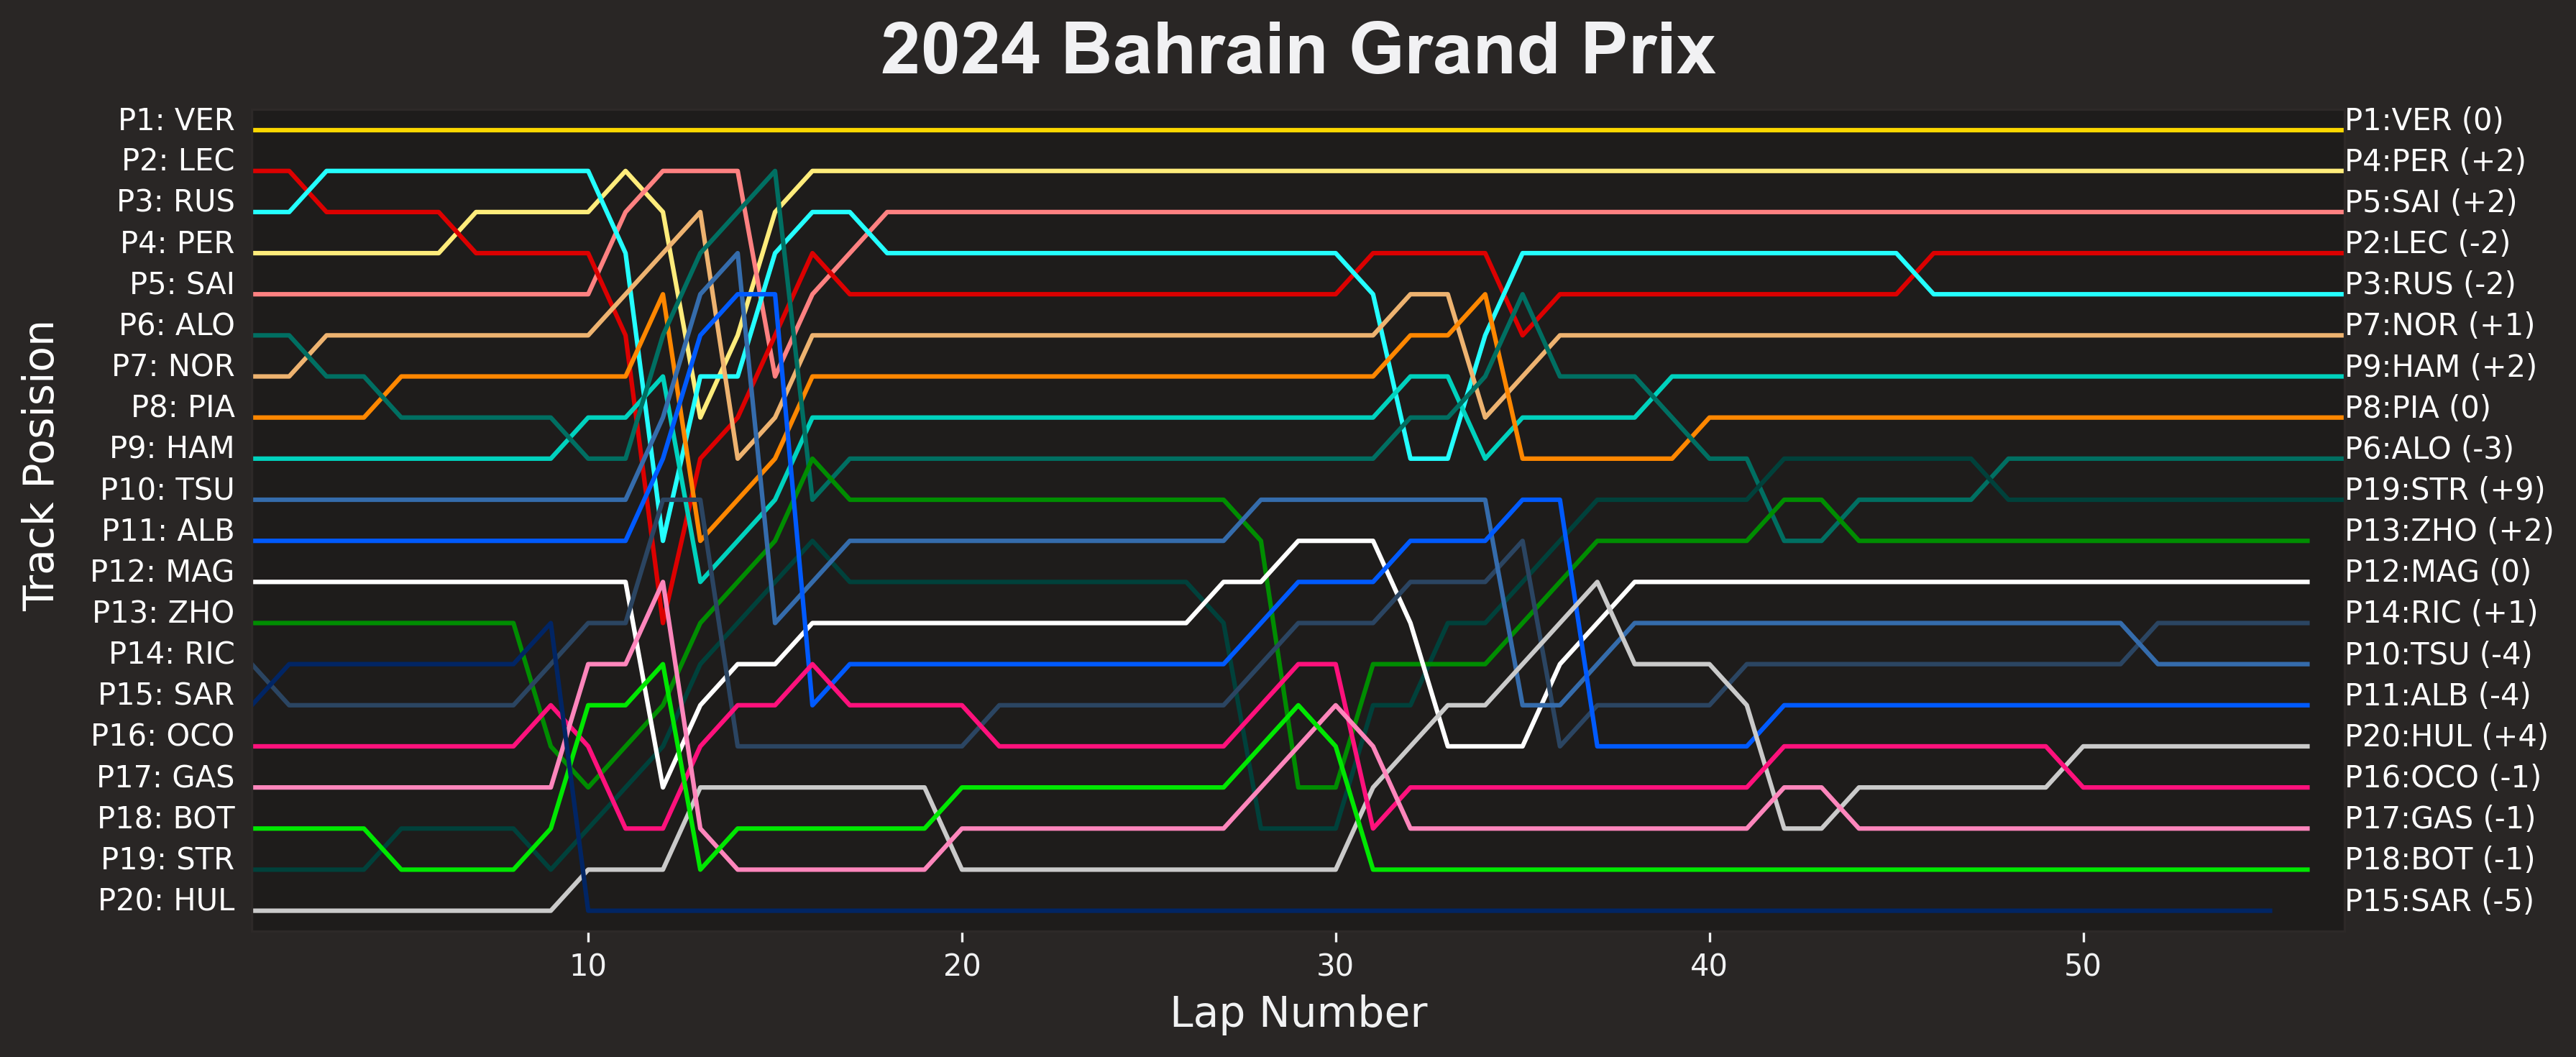

In [5]:
fig, ax = plt.subplots(figsize=(12, 5), dpi = 300)
for drv in session.drivers:
    drv_laps = session.laps.pick_driver(drv)

    abb = drv_laps['Driver'].iloc[0]
    color = ff1.plotting.driver_color(abb)

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
            label=abb, color=color)
    
for drv in session.drivers:
        drv_laps = session.laps.pick_driver(drv)
        abb = drv_laps['Driver'].iloc[0]
        starting_position = int(drv_laps['Position'].iloc[0])
        ax.text(0.8, drv_laps['Position'].iloc[0], f"P{starting_position}: {abb} ", color='w', ha='right')
    
for drv in session.drivers:
    drv_laps = session.laps.pick_driver(drv)
    abb = drv_laps['Driver'].iloc[0]
    final_position = drv_laps['Position'].iloc[-1]
    starting_position = int(drv_laps['Position'].iloc[0])
    places_gained = int(starting_position - final_position)
    places_text =  f"({'+' if places_gained > 0 else '' if places_gained == 0 else '-'}{abs(places_gained)})"
    ax.text(57, final_position, f"P{starting_position}:{abb} {places_text}", color='w', ha='left') 

        
ax.annotate('Track Posision', xy=(-0.11, 0.4), xycoords='axes fraction', fontsize=14, color='w', rotation = 90)


ax.set_ylim([20.5, 0.5])
ax.set_yticks([])
ax.set_xlabel('Lap Number', fontsize = 14)
ax.set_xlim([1,57])
plt.title('2024 Bahrain Grand Prix', font = 'Arial', fontweight = 'bold', fontsize = 24)
plt.tight_layout()

plt.show()

In [6]:
import seaborn as sns

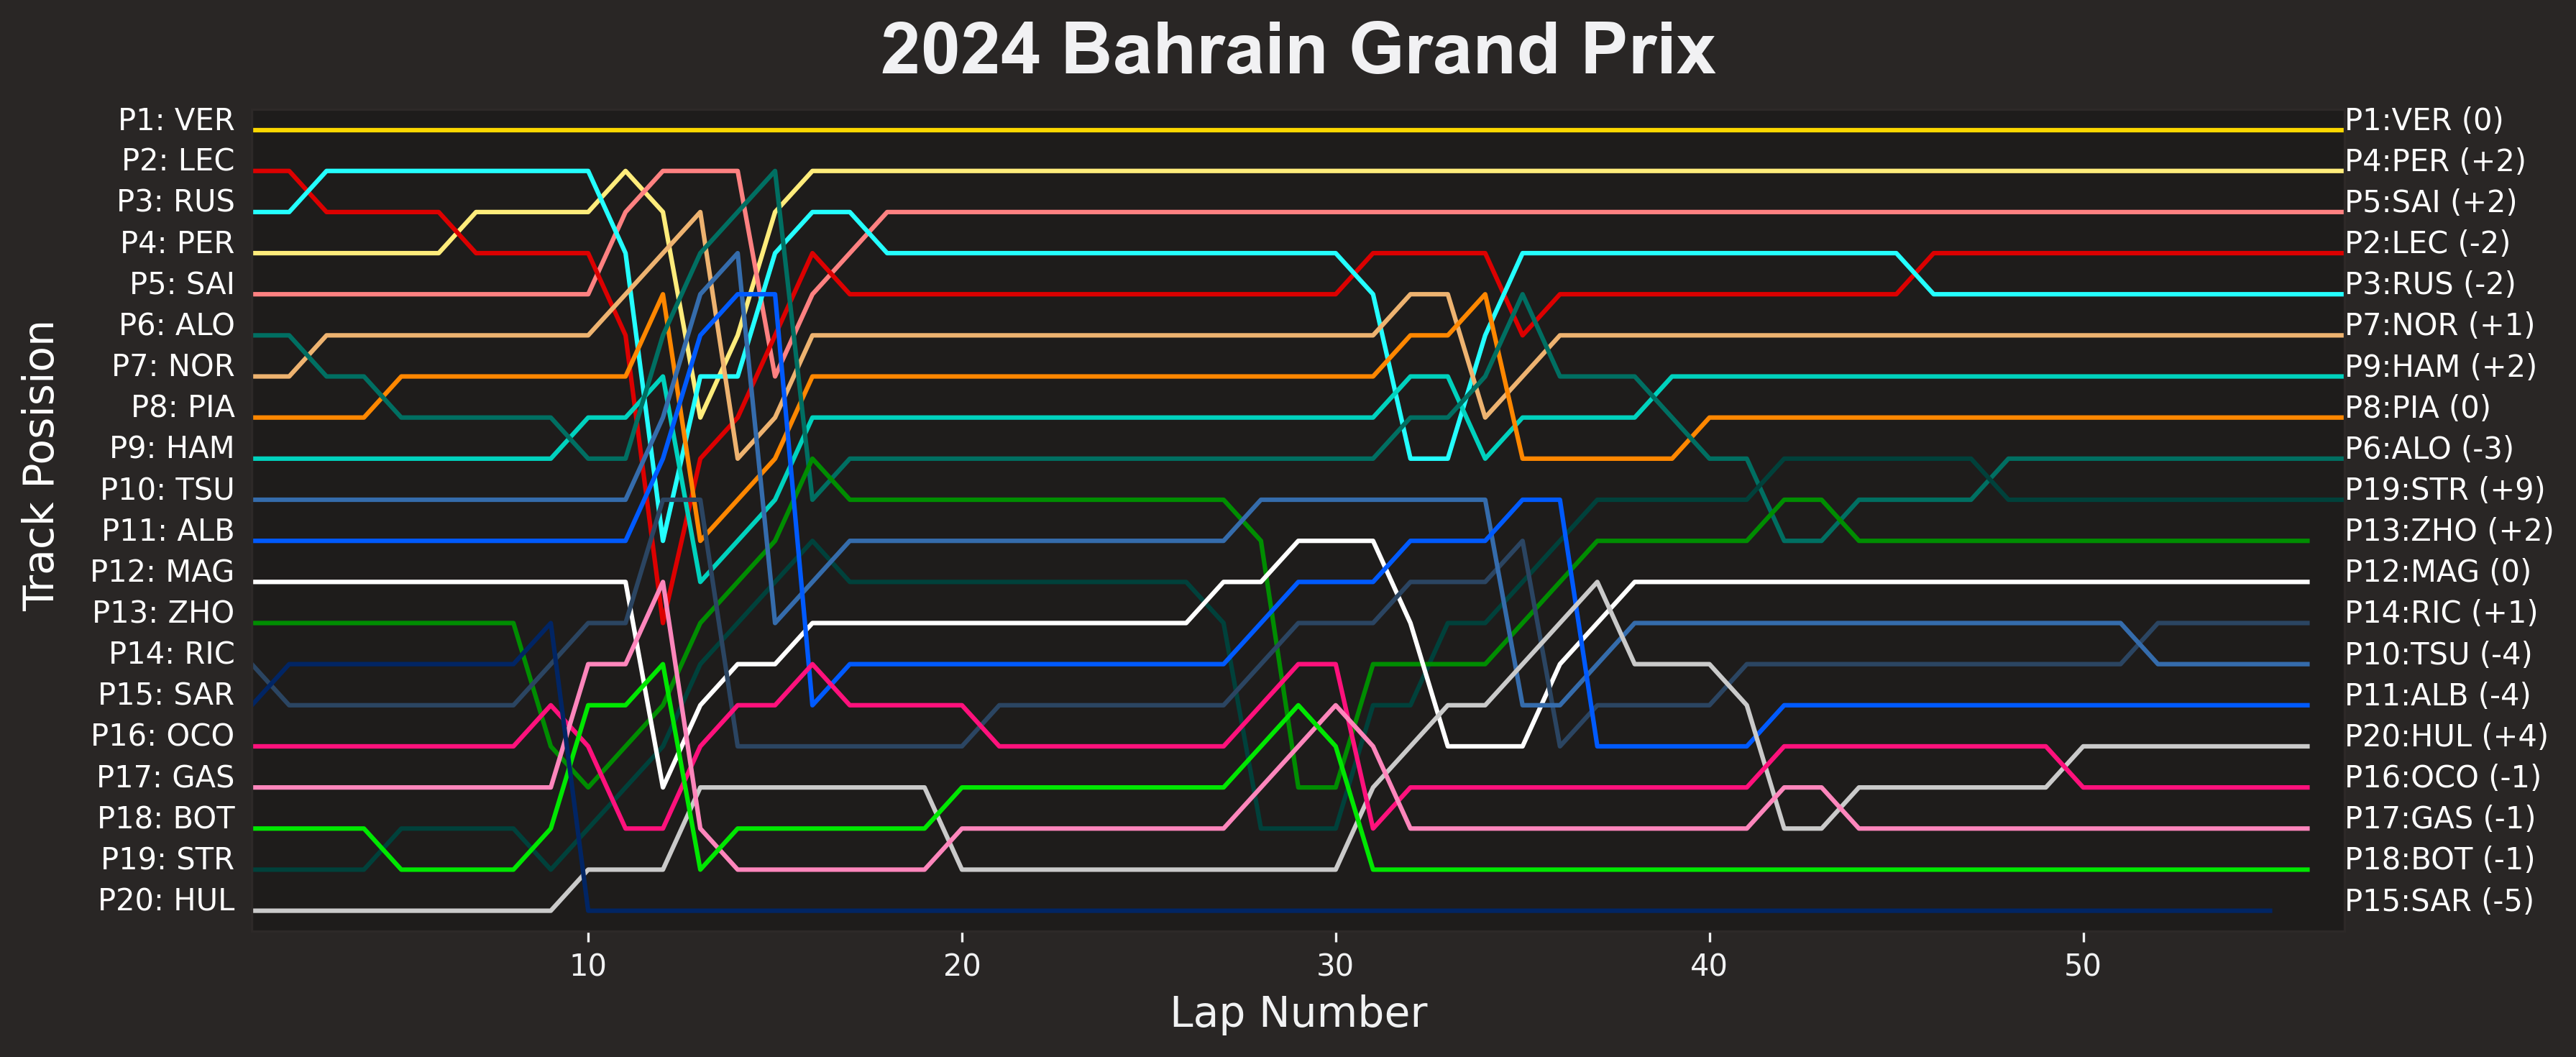

In [7]:
fig, ax = plt.subplots(figsize=(12, 5), dpi = 300)
for drv in session.drivers:
    drv_laps = session.laps.pick_driver(drv)

    abb = drv_laps['Driver'].iloc[0]
    color = ff1.plotting.driver_color(abb)

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
            label=abb, color=color)
    
for drv in session.drivers:
        drv_laps = session.laps.pick_driver(drv)
        abb = drv_laps['Driver'].iloc[0]
        starting_position = int(drv_laps['Position'].iloc[0])
        ax.text(0.8, drv_laps['Position'].iloc[0], f"P{starting_position}: {abb} ", color='w', ha='right')
    
for drv in session.drivers:
    drv_laps = session.laps.pick_driver(drv)
    abb = drv_laps['Driver'].iloc[0]
    final_position = drv_laps['Position'].iloc[-1]
    starting_position = int(drv_laps['Position'].iloc[0])
    places_gained = int(starting_position - final_position)
    places_text =  f"({'+' if places_gained > 0 else '' if places_gained == 0 else '-'}{abs(places_gained)})"
    ax.text(57, final_position, f"P{starting_position}:{abb} {places_text}", color='w', ha='left') 

        
ax.annotate('Track Posision', xy=(-0.11, 0.4), xycoords='axes fraction', fontsize=14, color='w', rotation = 90)


ax.set_ylim([20.5, 0.5])
ax.set_yticks([])
ax.set_xlabel('Lap Number', fontsize = 14)
ax.set_xlim([1,57])
plt.title('2024 Bahrain Grand Prix', font = 'Arial', fontweight = 'bold', fontsize = 24)
plt.tight_layout()

plt.show()

## Tyre Strategy

In [8]:
laps = session.laps
drivers = session.drivers
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]

In [9]:
session.laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:01:37.510000,VER,1,0 days 00:01:37.284000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:41.266000,...,False,Red Bull Racing,0 days 00:59:59.911000,2024-03-02 15:03:42.342,12,1.0,False,,False,False
1,0 days 01:03:13.806000,VER,1,0 days 00:01:36.296000,2.0,1.0,NaT,NaT,0 days 00:00:30.916000,0 days 00:00:41.661000,...,False,Red Bull Racing,0 days 01:01:37.510000,2024-03-02 15:05:19.941,1,1.0,False,,False,True
2,0 days 01:04:50.559000,VER,1,0 days 00:01:36.753000,3.0,1.0,NaT,NaT,0 days 00:00:30.999000,0 days 00:00:41.966000,...,False,Red Bull Racing,0 days 01:03:13.806000,2024-03-02 15:06:56.237,1,1.0,False,,False,True
3,0 days 01:06:27.206000,VER,1,0 days 00:01:36.647000,4.0,1.0,NaT,NaT,0 days 00:00:30.931000,0 days 00:00:41.892000,...,False,Red Bull Racing,0 days 01:04:50.559000,2024-03-02 15:08:32.990,1,1.0,False,,False,True
4,0 days 01:08:04.379000,VER,1,0 days 00:01:37.173000,5.0,1.0,NaT,NaT,0 days 00:00:31.255000,0 days 00:00:42.056000,...,False,Red Bull Racing,0 days 01:06:27.206000,2024-03-02 15:10:09.637,1,1.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,0 days 02:25:37.856000,SAR,2,0 days 00:01:35.972000,51.0,4.0,NaT,NaT,0 days 00:00:30.781000,0 days 00:00:41.539000,...,True,Williams,0 days 02:24:01.884000,2024-03-02 16:27:44.315,1,20.0,False,,False,True
1125,0 days 02:27:13.843000,SAR,2,0 days 00:01:35.987000,52.0,4.0,NaT,NaT,0 days 00:00:30.775000,0 days 00:00:41.440000,...,True,Williams,0 days 02:25:37.856000,2024-03-02 16:29:20.287,1,20.0,False,,False,True
1126,0 days 02:28:49.931000,SAR,2,0 days 00:01:36.088000,53.0,4.0,NaT,NaT,0 days 00:00:30.798000,0 days 00:00:41.610000,...,True,Williams,0 days 02:27:13.843000,2024-03-02 16:30:56.274,1,20.0,False,,False,True
1127,0 days 02:30:29.545000,SAR,2,0 days 00:01:39.614000,54.0,4.0,NaT,NaT,0 days 00:00:32.179000,0 days 00:00:43.748000,...,True,Williams,0 days 02:28:49.931000,2024-03-02 16:32:32.362,1,20.0,False,,False,True


In [10]:
stints = laps[["Driver", "Stint", "Compound", "LapNumber", 'FreshTyre']]
stints = stints.groupby(["Driver", "Stint", "Compound", "FreshTyre"]).count().reset_index() 
stints = stints.rename(columns={"LapNumber": "StintLength"})

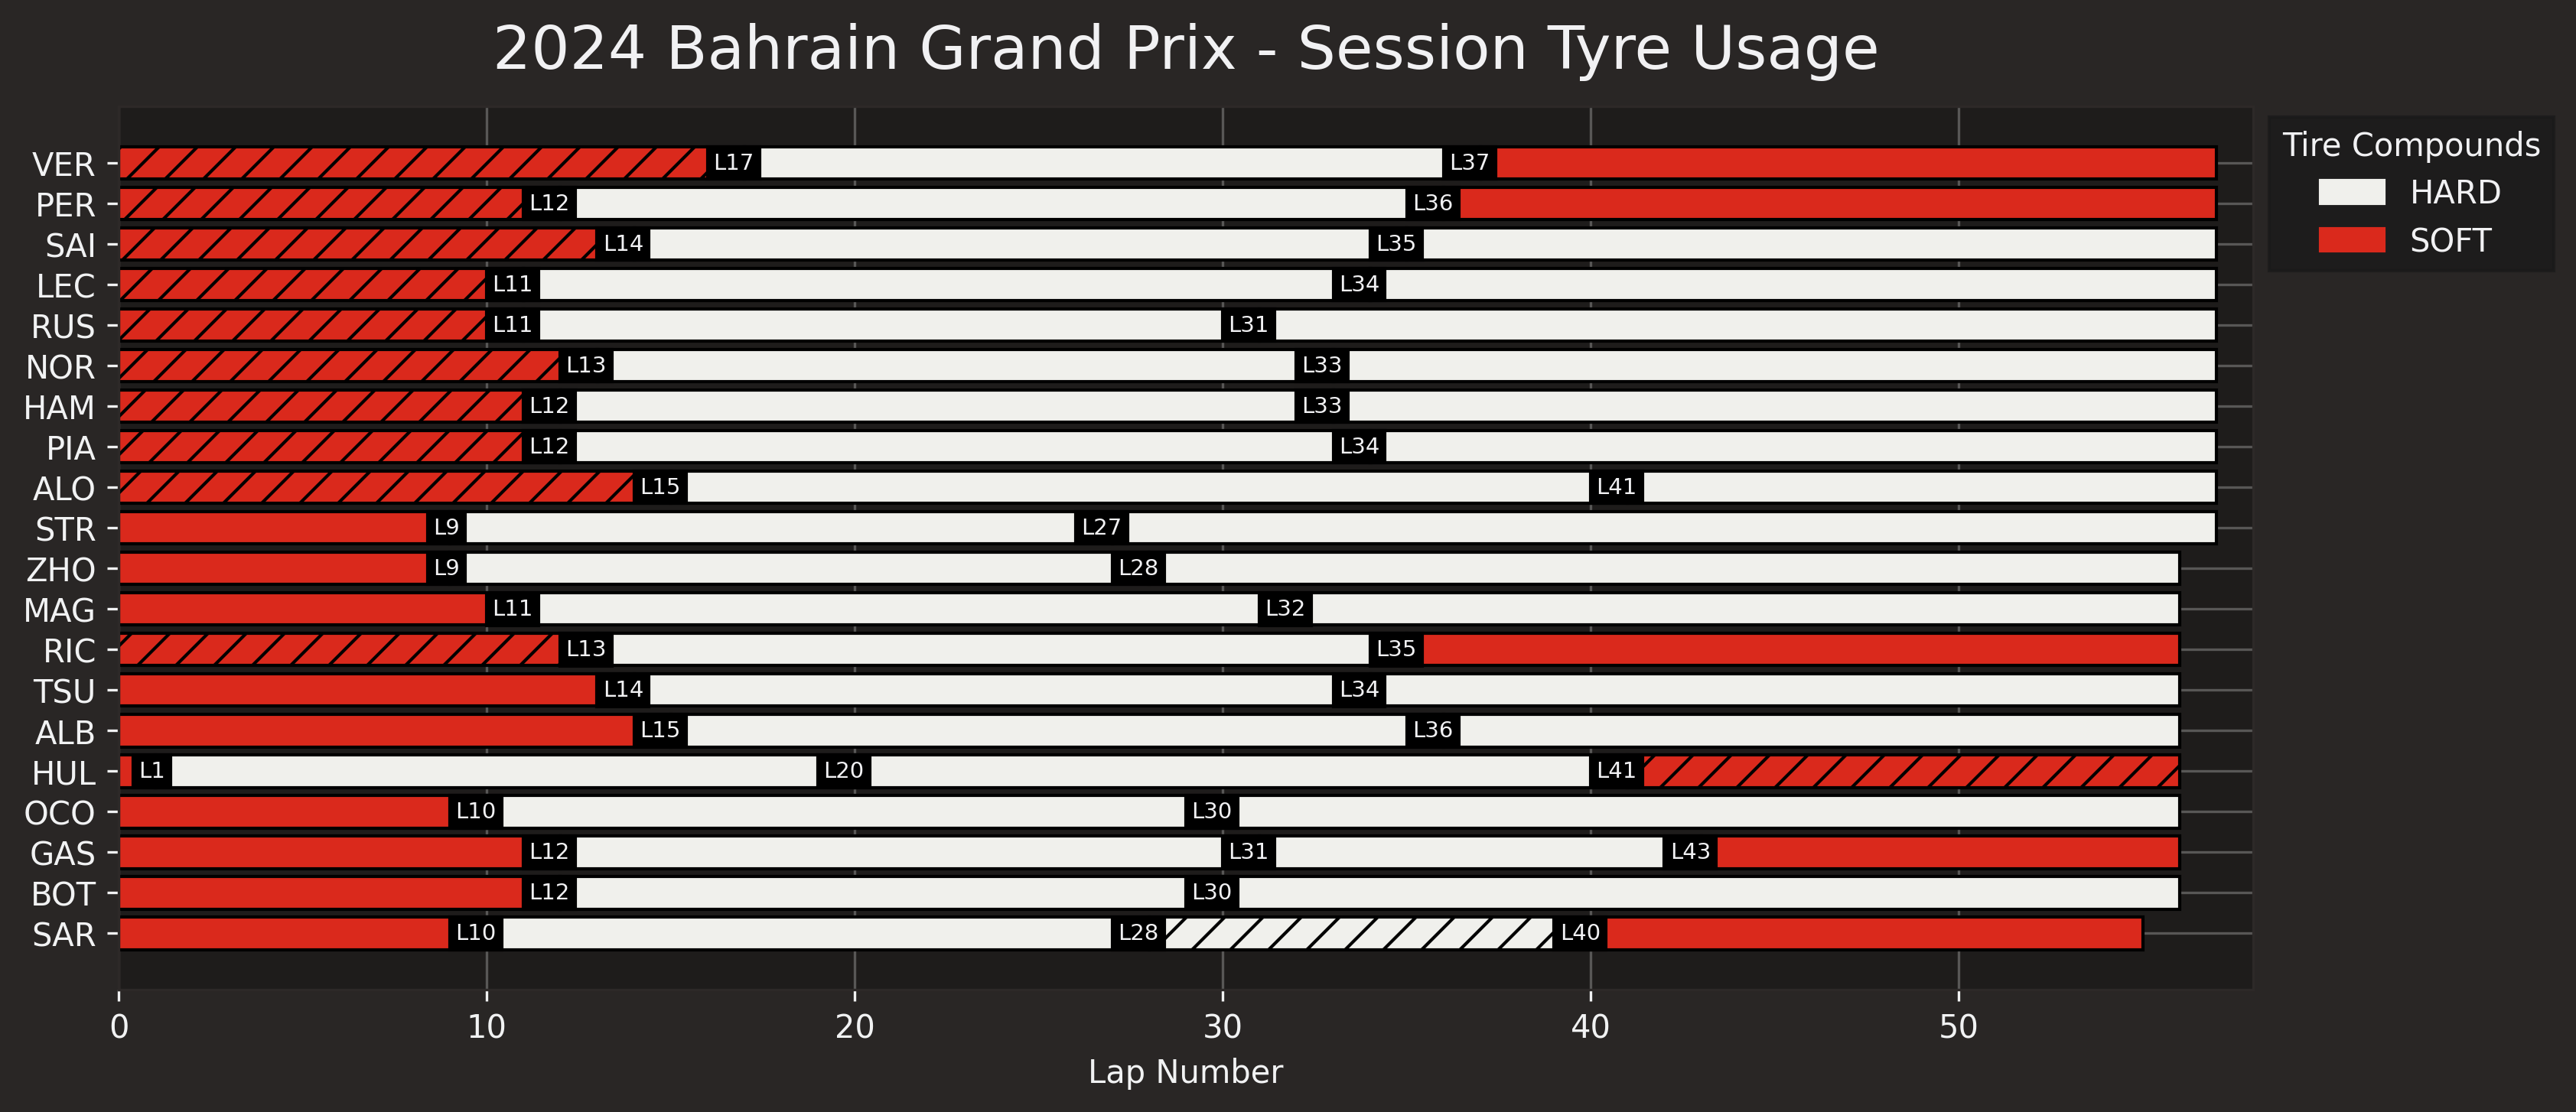

In [11]:
from matplotlib.patches import Patch
# Plot the strategies
fig, ax = plt.subplots(figsize=(12, 5), dpi=300)

used_compounds = set(stints["Compound"])

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        hatch_pattern = '' if row['FreshTyre'] else '//'

        bar = plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=fastf1.plotting.COMPOUND_COLORS[row["Compound"]],
            edgecolor="black",
            fill=True,
            hatch=hatch_pattern
        )

        stint_end = previous_stint_end + row["StintLength"]
        is_last_stint = (idx == driver_stints.index[-1])
        
        if previous_stint_end >= 0  and not is_last_stint:
            plt.annotate(
                f"L{stint_end}", 
                xy=(stint_end, drivers.index(driver)),
                xytext=(3, 0), 
                textcoords="offset points",
                va='center',
                ha='right',
                fontsize=7,
                bbox=dict(boxstyle="square,pad=0.25", ec = 'black', fc="black", lw=1)
            )

        previous_stint_end = stint_end

legend_patches = [Patch(color=fastf1.plotting.COMPOUND_COLORS[compound], label=compound) for compound in used_compounds]
plt.legend(handles=legend_patches, title="Tire Compounds", bbox_to_anchor=(1, 1.006), loc='upper left')
plt.xlim(0,58)
plt.title("2024 Bahrain Grand Prix - Session Tyre Usage")
plt.xlabel("Lap Number")
plt.grid(True, alpha=.4)
ax.invert_yaxis()
plt.show()
